# 4.9_seaborn_exercises
## Q's 1-4 and 1-4

#### Hackney, Chad
#### 15 Mar 19

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df_iris = sns.load_dataset('iris')

In [9]:
type(df_iris)

pandas.core.frame.DataFrame

In [10]:
df_iris.shape

(150, 5)

In [11]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df_iris.species.nunique()
# notice the difference between this cell and the one below:
# this cell uses .nunique(), and the one below uses .unique()... notice the 'n' in .nunique()
# .nunique() counts unique items in the series, while .unique() simply lists those unique items

3

In [14]:
print(df_iris.species.unique())

['setosa' 'versicolor' 'virginica']


In [15]:
df_iris.describe()
# .describe() gives descriptive statistics about the data in the table.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Use the iris database to answer the following quesitons:

What does the distribution of petal lengths look like?

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


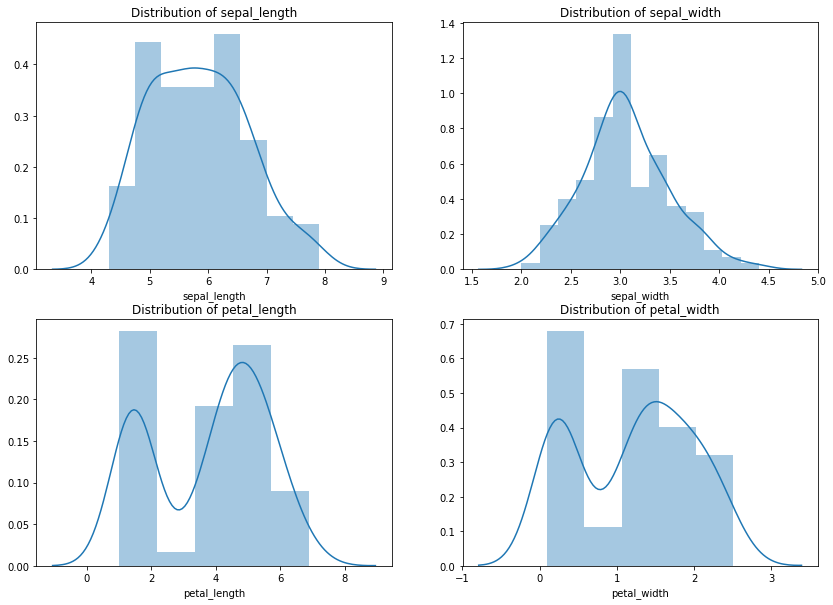

In [16]:
# my code, immediately below, looks specifically at the distribution of petal lengths,
# per the question as asked in the exercises.
#sns.distplot(df_iris.petal_length)


# Zach's code below takes the idea one step further and looks at the distribution of all the
# numberical fields in this data set.  This might save a step later.  I like this.

plt.figure(figsize=(14, 10))  # defines the plot(s) structure, shape and size

for i, col in enumerate(df_iris.drop(columns='species')): # "for every plot here, do not include 'species' field"
    plot_no = i + 1  # creates the four plots, 'i + an additionl 1 plot, enumerating' to create 4 plots from 4 fields.
    plt.subplot(2, 2, plot_no)  # plot 4-subplots, two plots wide, two plots tall, by plot_no from above.
    sns.distplot(df_iris[col]) # seaborn plot logic, create plot based on df_iris, with cols generating each of the plots.
    plt.title('Distribution of ' + col) # adds title to each, 'distibution of ' + each column name.

Is there a correlation between petal length and petal width?

Text(32.09375, 0.5, 'y')

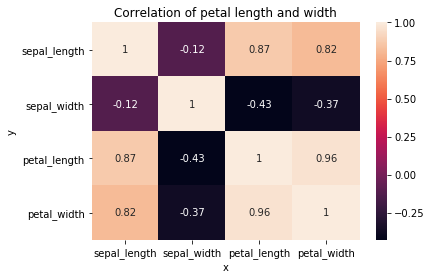

In [17]:
# first create a variable that uses .corr() function to look at correlations for all the numerical fields
# in the data set, and generate a numerial percentage of correlation for each.
# then plug this variable into the creation of the heatmap, as the database in the first paren. position
# required for creating the heatmap

variable_of_iris_corr = df_iris.corr()

# plot the heatmap and add annotation on it, to indicate the numberical percentage of correlation on each square.
sns.heatmap(variable_of_iris_corr, annot=True)
plt.title('Correlation of petal length and width')
plt.xlabel('x')
plt.ylabel('y')
# the above items format the correlation heatmap, giving the chart a title, and x & y labels
# can also format for color, etc.


# on the example below, the bar on the right describes level of correlation, incrementing toward 1.00,
# which would be a 1-to-1 correlation, as is seen with comparing a field against itself.

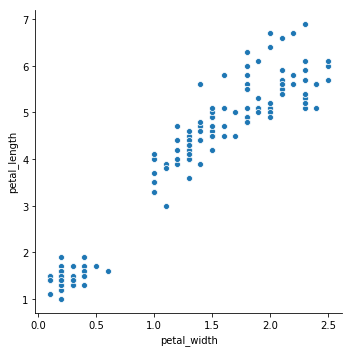

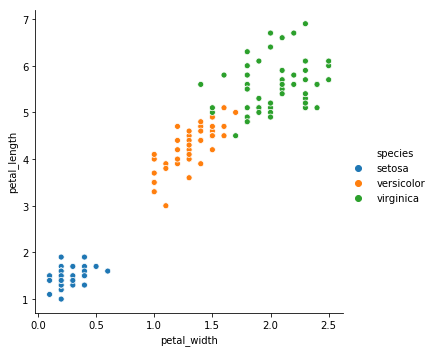

In [18]:
# Follow on:
# It appears there is a correlation between petal length and width. 
# Let's look closer:

sns.relplot(x='petal_width', y='petal_length', data=df_iris)  # basic 2 dimensional
sns.relplot(x='petal_width', y='petal_length', hue='species', data=df_iris) # 3 dimensional, adds color for detail

In [19]:
# Answer:  yes, it appears there may be correlation between petal length and petal width.

Would it be reasonable to predict species based on sepal width and sepal length?

Text(0.5, 1.0, 'Predict species via sepal width & length?')

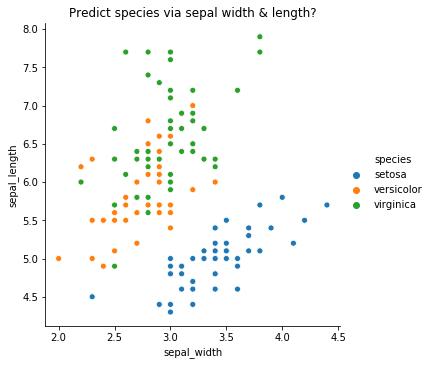

In [20]:
# short answer maybe, depends upon the species.  For setosa, possibly... for the other two, its much less certain. 
# "sns.relplot()"" uses at least two arguments for X and Y axis, and sometimes 'hue' to add a third field,
# as a third dimension to this relationship plot
# "data="" refers to what dataset is being looked at, i.e. where the x and y axis fields come from, what dataset?

sns.relplot(x='sepal_width', y='sepal_length', hue='species', data=df_iris)
plt.title('Predict species via sepal width & length?')
# plt.title() simply adds the title of the plot

Which features would be best used to predict species?

In [21]:
df_iris.corr()
# it appears on the correlation table below, the highest correlation percentage is between pedal width and
# pedal length, which would be the best means of determining species.
# or possibly a combination of petal and sepal lengths

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [22]:
# Per Zach's walkthrough notes:
# "One way we could determine which features are best to predict species
# is to find the features where the mean values for each species are the
# most different..."

# "...Since petal length and petal width have the largest "breadth" in their means,
# we might start by using these to predict the species."

# interesting

# Zach's code to do this
df_iris.groupby('species').mean().std()

sepal_length    0.795061
sepal_width     0.336822
petal_length    2.090700
petal_width     0.896735
dtype: float64

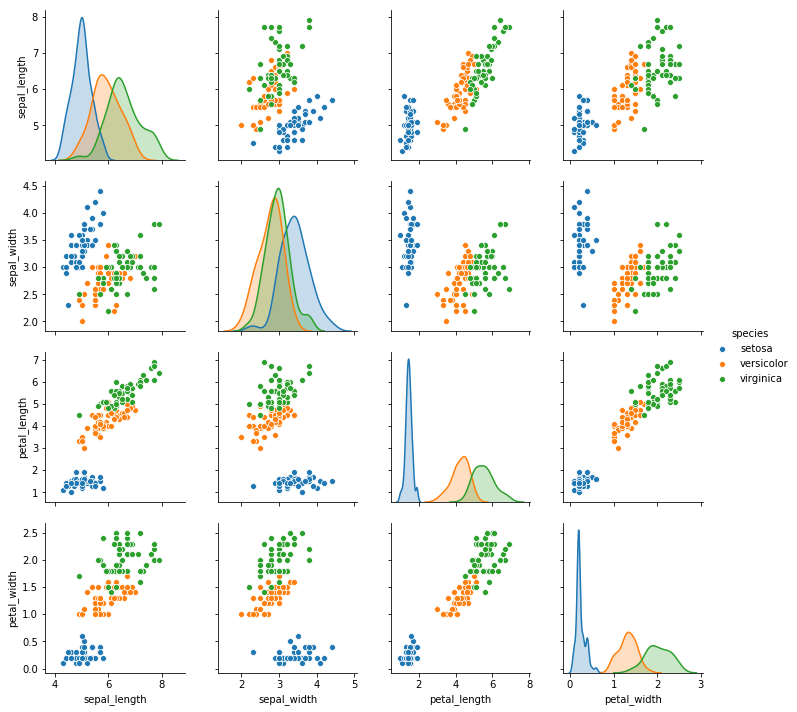

In [23]:
sns.pairplot(data=df_iris, hue="species")

### Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_anscombe = sns.load_dataset('anscombe')

In [25]:
type(df_anscombe)

pandas.core.frame.DataFrame

In [26]:
df_anscombe.shape

(44, 3)

In [27]:
df_anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [28]:
df_anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [29]:
df_anscombe.describe()
# .describe() displays descriptive statistics about the two columns of numerical data in the set

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.

What do you notice?

In [30]:
df_anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

What do you notice?

In [31]:
# See below:
#     Dataset I - no pattern
#     Dataset II - rises, then falls off
#     Dataset III - rises and runs incrementally, appears 1 outlier.
#     Dataset IV - straight line upward, static X axis at value 8, rising on Y axis from 5-9. Appears 1 outlier.

# Also, it appears data sets 1-3 are congretated on x axis, regarding all descriptive statistics, while dataset 4
# has all the same values on the x axis, all congreated at value 8.

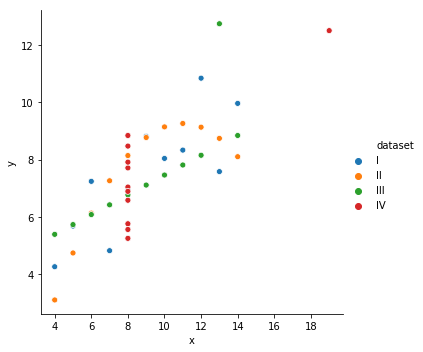

In [32]:
sns.relplot(x='x', y='y', hue='dataset', data=df_anscombe)

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

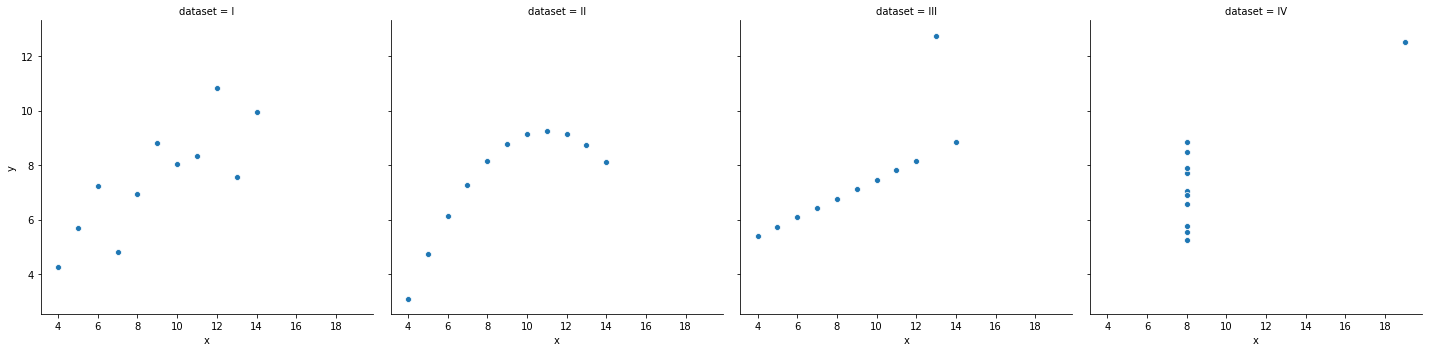

In [33]:
# lets have another look by breaking these four items out into their own charts, using 'col= '
sns.relplot(x='x', y='y', col='dataset', data=df_anscombe)


# According to the descriptive statitistics table above, all four data sets have the same mean,
# and same standard deviation, but look different when plotted out individually.

Load the InsectSprays dataset and read its documentation.

In [34]:
from pydataset import data

In [35]:
# for reference, below is a list of all the datasets in the pydataset library in python.

data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [37]:
#df_InsectSprays = sns.load_dataset('InsectSprays')

df_InsectSprays = data('InsectSprays')
# load the dataset and store it in a variable

data('InsectSprays', show_doc=True)
# view the documentation for the dataset

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [38]:
type(df_InsectSprays)

pandas.core.frame.DataFrame

In [39]:
df_InsectSprays.shape

(72, 2)

In [40]:
df_InsectSprays.dtypes

count     int64
spray    object
dtype: object

In [41]:
df_InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [42]:
np.unique(df_InsectSprays.spray)
#print(np.unique(df_InsectSprays.spray))  #can also use print() to simply display it with no array or dtype info.

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [43]:
df_InsectSprays.describe()

,count
count,72.000000
mean,9.500000
std,7.203286
min,0.000000
25%,3.000000
50%,7.000000
75%,14.250000
max,26.000000


In [44]:
df_InsectSprays.groupby('spray').describe()
# this groups the data by unique items in 'spray' field and runs summary statistics on contents of each grouping

count                                                    
      count       mean       std  min    25%   50%    75%   max
spray                                                          
A      12.0  14.500000  4.719399  7.0  11.50  14.0  17.75  23.0
B      12.0  15.333333  4.271115  7.0  12.50  16.5  17.50  21.0
C      12.0   2.083333  1.975225  0.0   1.00   1.5   3.00   7.0
D      12.0   4.916667  2.503028  2.0   3.75   5.0   5.00  12.0
E      12.0   3.500000  1.732051  1.0   2.75   3.0   5.00   6.0
F      12.0  16.666667  6.213378  9.0  12.50  15.0  22.50  26.0

Create a boxplot that shows the effectiveness of the different insect sprays.

Text(0.5, 1.0, 'InsectSprays data')

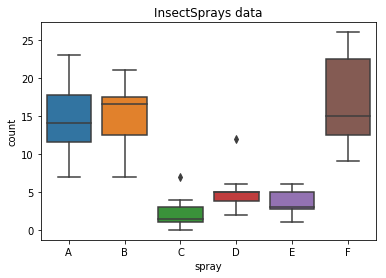

In [45]:
sns.boxplot(x='spray',y='count', data=df_InsectSprays)
plt.title('InsectSprays data')

Load the swiss dataset and read its documentation.

Create visualizations to answer the following questions:

In [46]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from pydataset import data

# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

%matplotlib inline

In [47]:
df_swiss = data('swiss')
# load the dataset from pydataset and store it in a dataframe or variable for use here

# immediately below, stolen from Zach's walkthrough:
# normalize the column names
df_swiss.columns = [col.lower() for col in df_swiss]


data('swiss', show_doc=True)
# now view the documentation for this dataset

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [48]:
type(df_swiss)

pandas.core.frame.DataFrame

In [49]:
df_swiss.shape

(47, 6)

In [50]:
df_swiss.dtypes

fertility           float64
agriculture         float64
examination           int64
education             int64
catholic            float64
infant.mortality    float64
dtype: object

In [51]:
df_swiss.sort_index().head()

,fertility,agriculture,examination,education,catholic,infant.mortality
Aigle,64.1,62.0,21,12,8.52,16.5
Aubonne,66.9,67.5,14,7,2.27,19.1
Avenches,68.9,60.7,19,12,4.43,22.7
Boudry,70.4,38.4,26,12,5.62,20.3
Broye,83.8,70.2,16,7,92.85,23.6


In [52]:
# np.unique(df_swiss.field_name)
#np.unique(df_gas_mileage.manufacturer)

In [53]:
df_swiss.describe()

,fertility,agriculture,examination,education,catholic,infant.mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [54]:
 #df_swiss.groupby('field_name').describe()

In [55]:
df_swiss.sort_index()
# use ".sort_index() to sort data frame or table by whatever field has been assigned as the index


# or can assign a field as an index and sort it by:
# df.set_index(df.field_name).sort_index()

# like this:
# df_swiss.set_index(df_swiss.catholic).sort_index()



# or just sort it by a given field in the df, and can assign it to print 'asc' or 'desc':
# df_swiss.sort_values(by='fertility', ascending=False)

# can daisy chain these ".some_function()" statements on repeatedly:
# ex:   "df_some_dataframe.upper().sort_values('df.some_field').some_function()" etc etc.
# or on a given field: "df_some_dataframe.some_field.upper().lower()" etc.


,fertility,agriculture,examination,education,catholic,infant.mortality
Aigle,64.1,62.0,21,12,8.52,16.5
Aubonne,66.9,67.5,14,7,2.27,19.1
Avenches,68.9,60.7,19,12,4.43,22.7
Boudry,70.4,38.4,26,12,5.62,20.3
Broye,83.8,70.2,16,7,92.85,23.6
Conthey,75.5,85.9,3,2,99.71,15.1
Cossonay,61.7,69.3,22,5,2.82,18.7
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Echallens,68.3,72.6,18,2,24.20,21.2


In [56]:
df_swiss.sort_index().head()

,fertility,agriculture,examination,education,catholic,infant.mortality
Aigle,64.1,62.0,21,12,8.52,16.5
Aubonne,66.9,67.5,14,7,2.27,19.1
Avenches,68.9,60.7,19,12,4.43,22.7
Boudry,70.4,38.4,26,12,5.62,20.3
Broye,83.8,70.2,16,7,92.85,23.6


Create a column named is_catholic that holds a boolean value of whether or not the province is Catholic.

(Choose a cutoff point for what constitutes catholic)

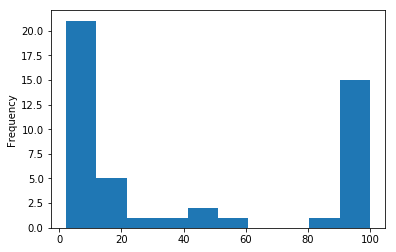

In [57]:
df_swiss.catholic.plot.hist()

In [58]:
df_swiss['is_catholic'] = df_swiss.catholic >= 80

Does whether or not a province is Catholic influence fertility?

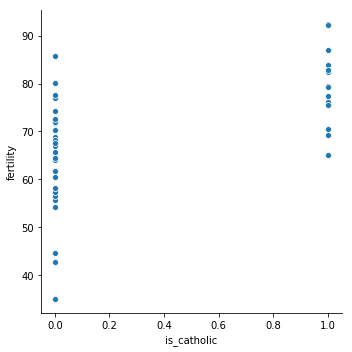

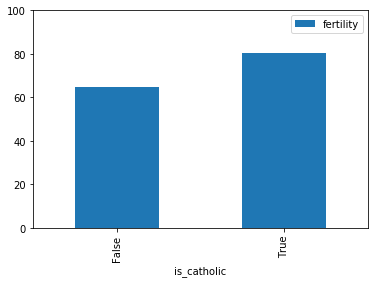

In [59]:
df_swiss['is_catholic'] = df_swiss.catholic >= 80
sns.relplot(x='is_catholic',y='fertility', data=df_swiss)


# Zach's sample:
df_swiss[['fertility', 'is_catholic']].groupby('is_catholic').mean().plot.bar(ylim=(0, 100))
# this plots the two fields "fertility" and "is_catholic" variable, by the t/f boolean of "is_catholic"

# it appears our two plots roughtly show a similar thing, except that mine shows the actual fertility values,
# vertically on the Y axis, spread out on an x- axis binary 0.0 / 1.0 scale, and his shows the same t/f plot,
# except he's using the mean of his fertility values, using a simple t/f x axis.

What measure correlates most strongly with fertility?

In [60]:
df_swiss.corr()

,fertility,agriculture,examination,education,catholic,infant.mortality,is_catholic
fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.605023
agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.475120
examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.641897
education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.328808
catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.957798
infant.mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.207544
is_catholic,0.605023,0.475120,-0.641897,-0.328808,0.957798,0.207544,1.000000


Text(32.09375, 0.5, 'y')

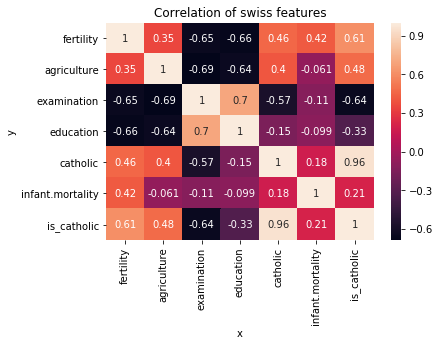

In [61]:
variable_of_swiss_corr = df_swiss.corr()

# plot the heatmap and add annotation on it, to indicate the numberical percentage of correlation on each square.
sns.heatmap(variable_of_swiss_corr, annot=True)
plt.title('Correlation of swiss features')
plt.xlabel('x')
plt.ylabel('y')

In [62]:
df_swiss.groupby('fertility').mean().std()
# copied from Zach's example above in iris dataset.

# it appears a province's fertility ties more closely to whether that province is predominantly catholic,
# than any other feature.  Although, other than catholicism, a higher proportion of provincial agriculture
# appears to be a close second indicator of fertility.

agriculture         22.747614
examination          8.013613
education            9.672013
catholic            40.939749
infant.mortality     2.904592
is_catholic          0.472045
dtype: float64

Using the chipotle dataset from the previous exercise...

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
# Zach typed:
# def get_db_url(user, host, password, db, driver='pymysql'):
#     return f'mysql+{driver}://{user}:{password}@{host}/{db}'

    
def get_db_url(user, host, password, db, driver='pymysql'):
    return f'mysql+{driver}://{user}:{password}@{host}/{db}'

In [65]:
import env

In [66]:
# url = get_db_url(env.user, env.host, env.password, db='chipotle')
# from sqlalchemy import create_engine

url = get_db_url(env.user, env.host, env.password, db='chipotle')
from sqlalchemy import create_engine

In [67]:
# connection = create_engine(url)

connection = create_engine(url)

In [68]:
df_chipotle = pd.read_sql('select * from orders;', url)

In [69]:
type(df_chipotle)

pandas.core.frame.DataFrame

In [70]:
df_chipotle.shape

(4622, 6)

In [71]:
df_chipotle.item_price = pd.Series(df_chipotle.item_price).str.replace('$','').str.replace(',','')
df_chipotle['item_price'] = df_chipotle.item_price.astype('float')

df_chipotle.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [72]:
df_chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [73]:
df_chipotle.describe

<bound method NDFrame.describe of         id  order_id  quantity                              item_name  \
0        1         1         1           Chips and Fresh Tomato Salsa   
1        2         1         1                                   Izze   
2        3         1         1                       Nantucket Nectar   
3        4         1         1  Chips and Tomatillo-Green Chili Salsa   
4        5         2         2                           Chicken Bowl   
5        6         3         1                           Chicken Bowl   
6        7         3         1                          Side of Chips   
7        8         4         1                          Steak Burrito   
8        9         4         1                       Steak Soft Tacos   
9       10         5         1                          Steak Burrito   
10      11         5         1                    Chips and Guacamole   
11      12         6         1                   Chicken Crispy Tacos   
12      13       

Chipotle: Create a barplot that shows the 4 most popular items and the revenue produced by each.

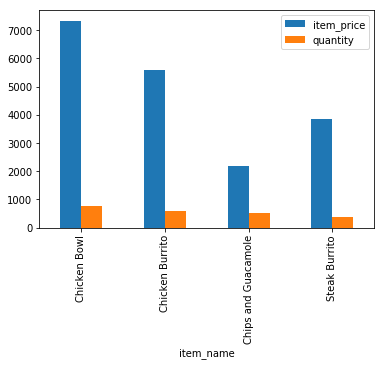

In [76]:
# df_chipotle

# This immediately below works to isolate item name, and the top four items, by summing quantity:
# df_chipotle.groupby('item_name').quantity.sum().sort_values(ascending=False).nlargest(4)

# df_chipotle_top_4 = df_chipotle.groupby('item_name').quantity.sum().sort_values(ascending=False).nlargest(4)

# # KEEP:  This immediately below grabs the 3 fields I need to make this work:
# df_chipotle.monkey = df_chipotle.item_price.sum()
# df_chipotle.monkey


#  UPDATE:  this immediately below grabs the top 4 items by REVENUE (summed "item_price")
# df_chipotle4 = df_chipotle[['item_name','item_price']].groupby('item_name').item_price.sum().sort_values(ascending=False).nlargest(4)
# df_chipotle4

# # UPDATE:  this immediately below grabs the top 4 items by SALES VOLUME (summed "quantity")
# df_chipotle3 = df_chipotle[['item_name','quantity']].groupby('item_name').quantity.sum().sort_values(ascending=False).nlargest(4)
# df_chipotle3

# # This below is the same as the item_price.sum() code, two items up, but doesn't call fields in brackets:
# df_chipotle_test = df_chipotle.groupby('item_name').item_price.sum().sort_values(ascending=False).nlargest(4)
# df_chipotle_test


df_chipotle[['item_name', 'item_price']].groupby('item_name').sum()
df_monkey = df_chipotle[['item_name', 'item_price', 'quantity']].groupby('item_name').sum().sort_values('quantity', ascending=False).nlargest(4,'quantity').plot.bar()
# should use a dual y axis, and add item labels for each bar with count/$ info.


#df_chipotle[['item_name', 'item_price']].groupby('item_name').sum().nlargest(7)
# df_chipotle[['item_name', 'item_price']].groupby('item_name').sum().nlargest(7, 'item_price')

In [ ]:
#  UPDATE:  this immediately below grabs the top 4 items by REVENUE (summed "item_price")
df_chipotle4 = df_chipotle[['item_name','item_price']].groupby('item_name').item_price.sum().sort_values(ascending=False).nlargest(4)
df_chipotle4

# UPDATE:  this immediately below grabs the top 4 items by SALES VOLUME (summed "quantity")
df_chipotle3 = df_chipotle[['item_name','quantity']].groupby('item_name').quantity.sum().sort_values(ascending=False).nlargest(4)
df_chipotle3

# This below is the same as the item_price.sum() code, two items up, but doesn't call fields in brackets:
df_chipotle_test = df_chipotle.groupby('item_name').item_price.sum().sort_values(ascending=False).nlargest(4)
df_chipotle_test

Load the sleepstudy data and read it's documentation.

Use seaborn to create a line plot of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [ ]:
# Finish this above.